In [1]:
from memote.suite.api import test_model
from memote.suite.cli.callbacks import validate_experimental
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import cobra
from cobra.flux_analysis import single_gene_deletion

In [2]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
sns.set_style('white')
sns.set_context("poster", font_scale=1.5)

In [3]:
from concerto.utils.gene_essentiality import create_ge_confusion_matrix

In [4]:
from rtoru import exp_file_path, model as rt_orig

Set parameter Username
Set parameter GURO_PAR_SPECIAL
Set parameter TokenServer to value "leghorn"


In [5]:
rt = rt_orig.copy()

Read LP format model from file C:\Users\pino216\AppData\Local\Temp\tmpwtzuymgm.lp
Reading time = 0.02 seconds
: 2076 rows, 4846 columns, 19812 nonzeros


In [6]:
import cobra
from cobra.flux_analysis import single_gene_deletion
from memote.experimental.config import ExperimentConfiguration

In [7]:
from rtoru.update_model import update_1, update_2
rt2 = cobra.io.read_sbml_model('../IFO0880_Reduced_Reactions_physically_derived_biomass.xml')
rt2 = update_1(rt2)
rt2 = update_2(rt2)

Read LP format model from file C:\Users\pino216\AppData\Local\Temp\tmpgig_ipy4.lp
Reading time = 0.02 seconds
: 2022 rows, 4178 columns, 19178 nonzeros


In [8]:
# adds Connahs biomass to current model.
biomass = rt2.reactions.get_by_any('R_BIOMASS')
rt.add_reactions(biomass)
rt.objective = 'R_BIOMASS'

for rxn in rt.reactions:
    try:
        rt2.reactions.get_by_id(rxn.id)
    except KeyError:
        rxn.objective_coefficient = -1

rt.reactions.R_BIOMASS.objective_coefficient = 1000

In [9]:
rt.slim_optimize()

-0.17596153846153822

In [10]:
rt_orig.slim_optimize()

0.07336590453116676

In [11]:
to_add = set()
for rxn in rt.reactions:
    try:
        rt2.reactions.get_by_id(rxn.id)
    except KeyError:
        to_add.add(rxn)
rt2.add_reactions(to_add)
rt2.objective = 'R_BIOMASS'

In [12]:
rt2.slim_optimize()

0.0

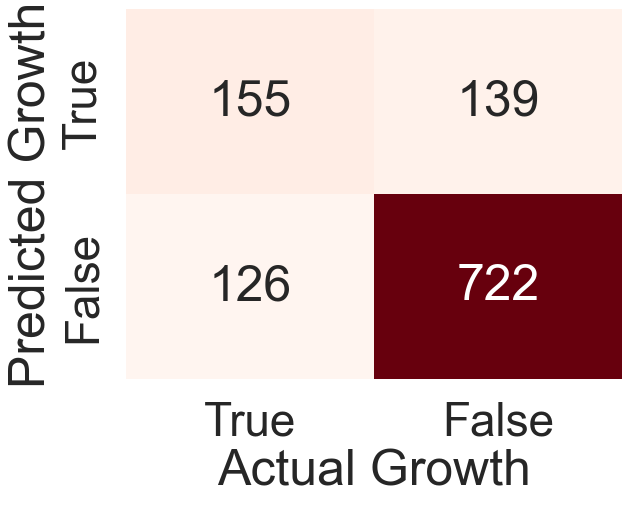

In [14]:
create_ge_confusion_matrix(rt_orig, exp_file_path);

{'TP':           predicted  actual
 gene                       
 RT_10845       True    True
 RT_10330       True    True
 RT_8845        True    True
 RT_13060       True    True
 RT_11145       True    True
 ...             ...     ...
 RT_9574        True    True
 RT_11682       True    True
 RT_12551       True    True
 RT_11752       True    True
 RT_11290       True    True
 
 [281 rows x 2 columns],
 'FP': Empty DataFrame
 Columns: [predicted, actual]
 Index: [],
 'FN':           predicted  actual
 gene                       
 RT_NAD4L      False    True
 RT_14436      False    True
 RT_13350      False    True
 RT_14023      False    True
 RT_15829      False    True
 ...             ...     ...
 RT_11982      False    True
 RT_12690      False    True
 RT_14480      False    True
 RT_15121      False    True
 RT_16228      False    True
 
 [861 rows x 2 columns],
 'TN': Empty DataFrame
 Columns: [predicted, actual]
 Index: []}

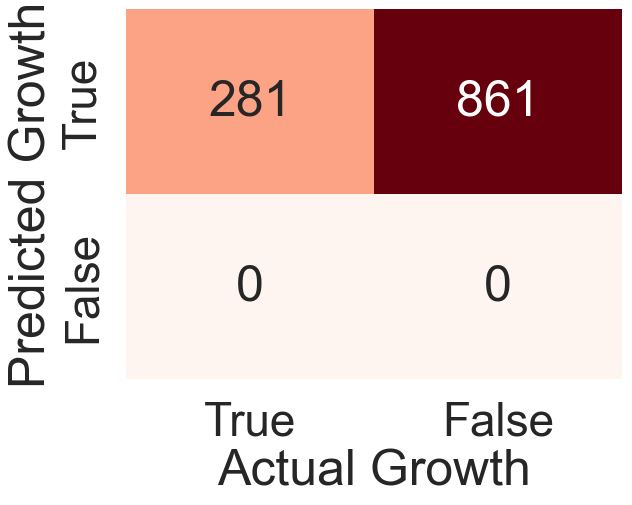

In [15]:
create_ge_confusion_matrix(rt2, exp_file_path)